In [1]:
import calc_rotation
from calc_rotation.sim_data.export_hdf5 import export_h5py_bz
from calc_rotation.sim_data.export_hdf5 import export_h5py_ne
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
print(sys.executable)

/home/pawel/anaconda3/envs/fdrot/bin/python


In [3]:
path = '/home/pawel/Work/PIConGPU/151_PizDaintCopper30nmPerfectContrast/simOutput/h5/'

In [4]:
! ls $path

simData_0.h5	   simData_137500.h5  simData_25000.h5	simData_65000.h5
simData_100000.h5  simData_140000.h5  simData_2500.h5	simData_67500.h5
simData_10000.h5   simData_142500.h5  simData_27500.h5	simData_70000.h5
simData_102500.h5  simData_145000.h5  simData_30000.h5	simData_72500.h5
simData_105000.h5  simData_147500.h5  simData_32500.h5	simData_75000.h5
simData_107500.h5  simData_150000.h5  simData_35000.h5	simData_7500.h5
simData_110000.h5  simData_15000.h5   simData_37500.h5	simData_77500.h5
simData_112500.h5  simData_152500.h5  simData_40000.h5	simData_80000.h5
simData_115000.h5  simData_155000.h5  simData_42500.h5	simData_82500.h5
simData_117500.h5  simData_157500.h5  simData_45000.h5	simData_85000.h5
simData_120000.h5  simData_160000.h5  simData_47500.h5	simData_87500.h5
simData_122500.h5  simData_162500.h5  simData_50000.h5	simData_90000.h5
simData_125000.h5  simData_165000.h5  simData_5000.h5	simData_92500.h5
simData_12500.h5   simData_167500.h5  simData_52500.h5	simData_95000.h

In [5]:
file = h5py.File(path + 'simData_0.h5')
grid_unit = file['data/0/fields/e_density'].attrs['gridUnitSI'] 
dt = file['data/0'].attrs['dt'] * file['data/0'].attrs['timeUnitSI']

In [6]:
print(grid_unit, dt)

4.243442250649631e-10 1.415459974863554e-18


In [7]:
inc_time = 50036 * dt /2

In [8]:
file_list = calc_rotation.sim_data.FilesLists.UniversalSingle(path, 'Bz', dt, grid_unit, 'simData_', '.h5',
                                   export_h5py_bz)

In [9]:
file_list2 = calc_rotation.sim_data.FilesLists.UniversalSingle(path, 'n_e', dt, grid_unit, 'simData_', '.h5',
                                   export_h5py_ne)

In [10]:
sequence = calc_rotation.SimSequence.seq_cells(0,256, inc_time, 2500, 10, {'Bz': file_list, 'n_e': file_list2})

In [11]:
sequence.number_of_steps

1

In [12]:
sequence.get_data('Bz', 'all').shape

(1280, 256)

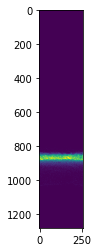

In [13]:
plt.imshow(sequence.get_data('n_e', 'all'))

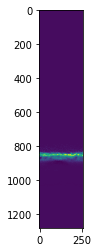

In [14]:
plt.imshow(sequence.get_data('n_e', 'all') * sequence.get_data('Bz', 'all'))


In [15]:
pulse = np.ones(10)
pulse = pulse /10

In [16]:
%timeit sequence.rotation_2d_perp(pulse)
%timeit sequence.rotation_2d_perp(pulse, interpolation = False)

4.37 s ± 42.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.97 s ± 43.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit sequence.rotation_2d_perp(pulse)
%timeit sequence.rotation_2d_perp(pulse, interpolation = False)

In [17]:
import cProfile
cProfile.runctx("sequence.rotation_2d_perp(pulse)", globals(), locals(), "Profile.prof")

In [ ]:
profile = line_profiler.LineProfiler(sequence.rotation_2d_perp)
profile.runcall?

In [ ]:
import pstats
s = pstats.Stats("Profile.prof")
s.strip_dirs().sort_stats("time").print_stats()

In [ ]:
%load_ext line_profiler
import line_profiler

In [ ]:
plt.imshow(rotated)
           

In [ ]:
file_list.open(0, 'Bz').shape

In [ ]:
file_list.ids

In [ ]:
5000 * 21 - 170000

In [ ]:
170000 * dt * 10**15

In [ ]:
grid_unit * 256 / speed_of_light * 10**15

In [ ]:
from scipy.constants import speed_of_light

In [ ]:
10 * 10**(-15) * speed_of_light / grid_unit

In [ ]:
10 /(grid_unit / speed_of_light * 10**15) 

In [ ]:
256 * grid_unit

In [ ]:
256 * 1280

In [2]:
test = np.random.rand(20)

In [6]:
test = test.reshape(5,4)

In [7]:
print(test)

[[0.58546679 0.73931144 0.04977106 0.57385409]
 [0.41449389 0.10353083 0.93009764 0.83795362]
 [0.42786274 0.4925392  0.46781274 0.62383277]
 [0.94017333 0.7359101  0.79230787 0.81969291]
 [0.00195521 0.57125345 0.98672902 0.39795671]]


In [8]:
calc_rotation.c_rotation.rotation_static_2d(test)

zz:0, yy0, up:1, down:2
zz:0, yy1, up:0, down:3
zz:1, yy0, up:1, down:2
zz:1, yy1, up:0, down:3
zz:2, yy0, up:1, down:2
zz:2, yy1, up:0, down:3
zz:3, yy0, up:1, down:2
zz:3, yy1, up:0, down:3
zz:4, yy0, up:1, down:2
zz:4, yy1, up:0, down:3


array([[0.75506977, 1.55525795, 1.18363945, 1.5899052 , 1.08881159],
       [1.64713548, 1.63891186, 1.05613361, 1.8453251 , 0.4333241 ],
       [0.80911096, 1.63535187, 0.96715978, 0.40856366, 1.41582598],
       [0.00370976, 1.78385347, 0.81181247, 0.78644686, 1.11084512]])

In [11]:
import line_profiler
profile = line_profiler.LineProfiler(calc_rotation.c_rotation.kernel_2d_perp)
profile.runcall(calc_rotation.c_rotation.rotation_static_2d, test)
profile.print_stats()

Timer unit: 1e-06 s



/home/pawel/anaconda3/envs/fdrot/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Could not extract a code object for the object <module 'calc_rotation.c_rotation' from '/home/pawel/Work/HZDR_files/fileu/user/ordyna35/Faraday_Rotation/faraday_rotation/calc_rotation/calc_rotation/c_rotation.cpython-37m-x86_64-linux-gnu.so'>
  
